In [1]:
import json 
import os 
import importlib
import inspect

from arc.arcdsl import solvers as solvers_mod
from arc.data.synthetic.dataset_dataloader import REARCDataset, ArcSyntheticDataLoader

In [4]:
re_arc_task_dir = os.path.join(os.environ['HOME'], 'arc', 'arc', 'data','re_arc', 'tasks')
dataset = REARCDataset(task_dir = re_arc_task_dir)
dataloader = ArcSyntheticDataLoader(dataset, batch_size=32, shuffle=True, normalize=True)
print(dataloader.normalize)

True


In [5]:
for batch in dataloader:
    print("Combined input shape:", batch['combined_input'].shape)
    print("Labels shape:", batch['labels'].shape)
    print("Problem IDs:", batch['problem_ids'])
    
    # Visualize the first combined input-output pair
    first_pair = batch['combined_input'][1].numpy()
    input_part = first_pair[:, :first_pair.shape[1]//2]
    output_part = first_pair[:, first_pair.shape[1]//2:]
    print("\nFirst input-output pair:")
    print("Input part:\n", input_part)
    print("Output part:\n", output_part)
    break 

Combined input shape: torch.Size([32, 1, 29, 58])
Labels shape: torch.Size([32, 160])
Problem IDs: ['0dfd9992', 'a48eeaf7', 'f35d900a', 'c8f0f002', '3631a71a', 'a48eeaf7', '5614dbcf', 'aba27056', '0dfd9992', 'aba27056', '72322fa7', '5614dbcf', '0dfd9992', 'aba27056', '3631a71a', 'f35d900a', 'f35d900a', 'dae9d2b5', 'dae9d2b5', 'f35d900a', '3631a71a', 'ed36ccf7', '72322fa7', 'f35d900a', 'dae9d2b5', '3631a71a', 'a48eeaf7', '0dfd9992', '0dfd9992', 'c8f0f002', 'c8f0f002', '72322fa7']

First input-output pair:
Input part:
 [[[0.9 0.9 0.9 1.  1.  0.9 0.9 0.9 0.9 0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.9 0.9 0.9 0.9
   0.9 0.9 0.9 0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0. ]
  [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.9 0.9 1.  1.
   0.9 0.9 0.9 0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0

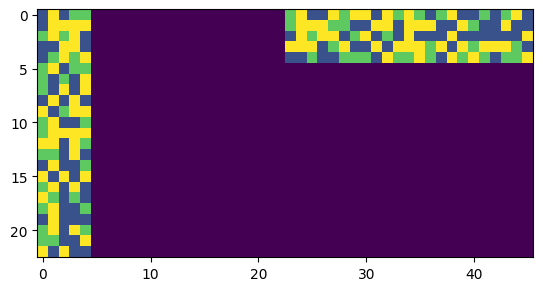

In [14]:
import matplotlib.pyplot as plt 

plt.imshow(batch['combined_input'][2].numpy())